# Kinds of Kindness: simulations code
This notebook contains the code necessary to create the simulated dataset for a (noisy) utility maximzer characterised by a utility function such as the CES on a given set of constraints.

In [2]:
import sys
sys.path.append('/Users/federicobassi/Desktop/TI.nosync/MPhil_Thesis/python/utils')
from utils.data_generation import *
from utils.data_plotting import *
from utils.test_rev_pref import *
from utils.maximize_utility_bc import *
from utils.budget_placement import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
np.random.seed(123)

## Setup

### Paths

In [3]:
path = "/Users/federicobassi/Desktop/TI.nosync/MPhil_Thesis"
img_path = path+"/plots"
out = path + "/simulated_data"

### Parameters distribution

In [4]:
# Parameters
param_distribution_ces = {'alpha_ces': lambda: np.random.uniform(0.5, 1),
                              'rho_ces': lambda: np.random.uniform(-0.5, 0.95)}

### Budget constraints

In [5]:
andreoni_miller_budgets = [(120, 40), (40, 120), (120, 60), (60, 120), (150, 75),
                               (75, 150), (60, 60), (100, 100), (80, 80), (160, 40), (40, 160)]

budgets_2 = [(40,160), (40,120), (40,100), (75,150), (70,100),(80,100), (60,60), (150,100), (150,75),(120,40), (160,40)]


upward_sloping = [(10, 130), (20, 110), (40, 70), (70,40), (110,20), (130, 10)]

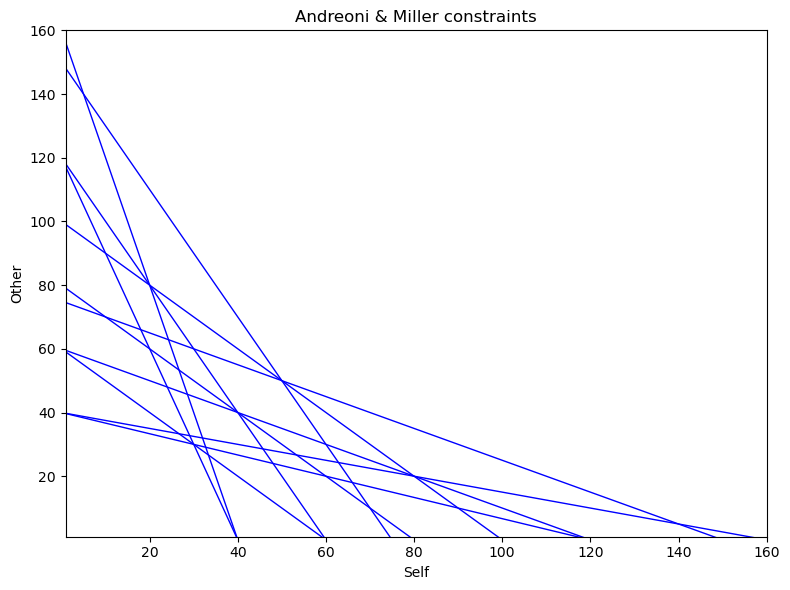

In [6]:
plot_simple_budget_constraints(andreoni_miller_budgets, title="Andreoni & Miller constraints", save=True, savepath=out, colors="blue")

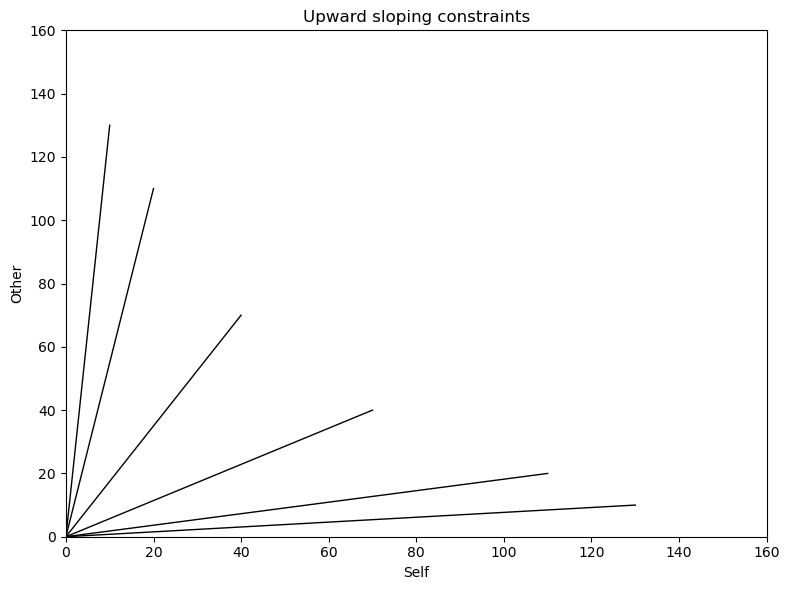

In [7]:
plot_simple_upward_constraints(upward_sloping, colors = "black", save="True", savepath=img_path+"/upward.png", title="Upward sloping constraints")

In [8]:
with open(out+"/budget_constraints_alg2.pkl", "rb") as f:
    budget_constraints_alg2 = pickle.load(f)

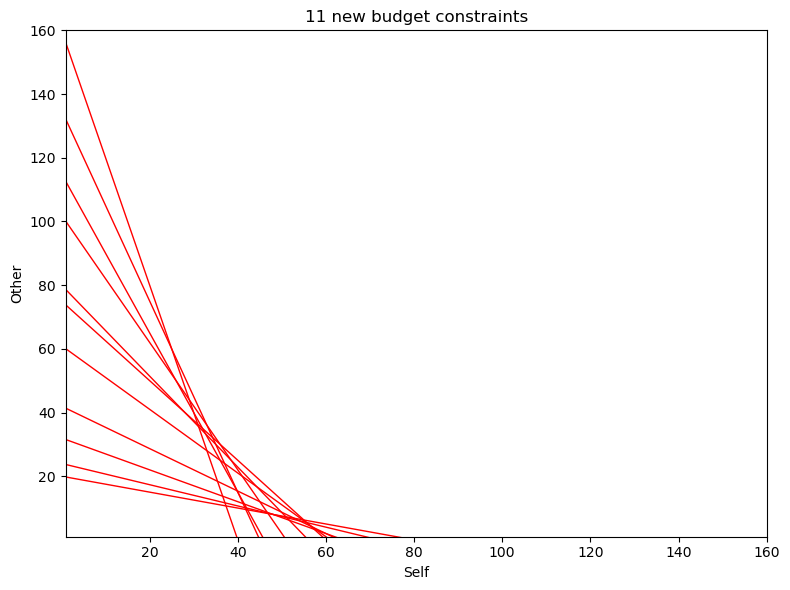

In [9]:
plot_simple_budget_constraints(budget_constraints_alg2, title="11 new budget constraints", save=True, savepath=out, colors="red")

## Data simulation

In [10]:
df_free_am, df_nodis_am = simulate_dataset(
        budgets = andreoni_miller_budgets,
        utility_func = ces,
        param_distributions=param_distribution_ces,
        n_samples= 500,
        noise_sd = [0,1,2,5,10],
        maximiser="exact")

In [ ]:
df_free_am

In [ ]:
df_free_nb_appr_1, df_nodis_nb_appr_1 = simulate_dataset(
        budgets = new_budgets_approach_1,
        utility_func = ces,
        param_distributions=param_distribution_ces,
        n_samples= 500,
        noise_sd = [0,1,2,5,10],
        maximiser="exact")

In [ ]:
df_free_nb_appr_2, df_nodis_nb_appr_2 = simulate_dataset(
        budgets = new_budgets_approach_2,
        utility_func = ces,
        param_distributions=param_distribution_ces,
        n_samples= 500,
        noise_sd = [0,1,2,5,10],
        maximiser="exact")

## Plot noise

In [ ]:
df_free_am["utility_func"] = ces 
plot_noise(
    df_free_am,
    utility_func=ces,
    noise_sd=10,
    free_disposal=False,
    save=True,
    savepath="/Users/federicobassi/Desktop",
    title = "Simulation results for CES Utility Function - α ~ U(0.5,1), ρ ~ U(-0.5,0.95)"
)

In [ ]:
df_nodis_nb_appr_2["utility_func"] = ces 
plot_noise(
    df_nodis_nb_appr_2,
    utility_func=ces,
    param_distributions= param_distribution_ces,
    noise_sd=5,
    free_disposal=False,
    save=False
)

## Test revealed preferences

### Plot the distribution of the CCEI score

In [ ]:
plot_index(df_nodis_am,
           title="CCEI distribution - Andreoni & Miller constraints ", 
           save_path = img_path+"/ccei_am", 
           note="Note. Utility function: CES with α ~ U(0.5,1), ρ ~ U(-0.5,0.95). Simulations: 500. Noise generated without free disposal.")

In [ ]:
plot_index(df_nodis_nb_appr_2, 
           title="CCEI distribution - 11 new budget constraints",
           save_path = img_path+"/ccei_nbs_alg2",
           note="Note. Utility function: CES with α ~ U(0.5,1), ρ ~ U(-0.5,0.95). Simulations: 500. Noise generated without free disposal.")

### Plot the distribution of the HMI index

In [ ]:
plot_index(df_nodis_am, 
           index_type="HMI", 
           title="HMI distribution - Andreoni & Miller constraints", 
           save_path = img_path+"/hmi_am", 
           note = "CES: α ~ U(0.5,0.95), ρ ~ U(-0.5,0.95). Simulations: 500. Noise generated without free disposal.")

In [ ]:
plot_index(df_nodis_nb_appr_1, 
           index_type="HMI", 
           title="HMI distribution - 11 new budget constraints (Alg. 1)", 
           save_path = img_path+"/hmi_nbs_alg_1",
           note = "CES: α ~ U(0.5,0.95), ρ ~ U(-0.5,0.95). Simulations: 500. Noise generated without free disposal.")

In [ ]:
plot_index(df_nodis_nb_appr_2, 
           index_type="HMI", 
           title="HMI distribution - 11 new budget constraints (Alg.2)", 
           save_path = img_path+"/hmi_nbs_alg_2",
           note = "CES: α ~ U(0.5,0.95), ρ ~ U(-0.5,0.95). Simulations: 500. Noise generated without free disposal.")

### Plot CCEI distribution by subject's type

In [ ]:
param_dists = {
    # ─────────────────────  ALTRUISTIC  ─────────────────────
    "altruistic_efficiency_maximiser": {
        "alpha_ces": lambda: np.random.uniform(0.5, 0.6),
        "rho_ces":   lambda: np.random.uniform(0.1, 0.9)
    },
    "altruistic_inequity_averse": {
        "alpha_ces": lambda: np.random.uniform(0.5, 0.6),
        "rho_ces":   lambda: np.random.uniform(-0.9, -0.1)
    },
    "altruistic_substitutes": {
        "alpha_ces": lambda: np.random.uniform(0.5, 0.6),
        "rho_ces":   lambda: np.random.uniform(0.9, 0.99)
    },
    "altruistic_complements": {
        "alpha_ces": lambda: np.random.uniform(0.5, 0.6),
        "rho_ces":   lambda: np.random.uniform(-20, -10)
    },
    "altruistic_cobb_douglas": {
        "alpha_ces": lambda: np.random.uniform(0.5, 0.6),
        # exactly 0.05 ⇒ “almost Cobb–Douglas”; use a narrow band if you prefer
        "rho_ces":   lambda: 0.05
    },

    # ───────────────────────  SELFISH  ──────────────────────
    "selfish_efficiency_maximiser": {
        "alpha_ces": lambda: np.random.uniform(0.6, 1.0),
        "rho_ces":   lambda: np.random.uniform(0.1, 0.9)
    },
    "selfish_inequity_averse": {
        "alpha_ces": lambda: np.random.uniform(0.6, 1.0),
        "rho_ces":   lambda: np.random.uniform(-0.9, -0.1)
    },
    "selfish_substitutes": {
        "alpha_ces": lambda: np.random.uniform(0.6, 1.0),
        "rho_ces":   lambda: np.random.uniform(0.9, 0.99)
    },
    "selfish_complements": {
        "alpha_ces": lambda: np.random.uniform(0.6, 1.0),
        "rho_ces":   lambda: np.random.uniform(-20, -10)
    },
    "selfish_cobb_douglas": {
        "alpha_ces": lambda: np.random.uniform(0.6, 1.0),
        "rho_ces":   lambda: 0.05
    },
}

In [ ]:
for label, pdist in param_dists.items():
    df_fs, df_nd = simulate_dataset(
        budgets            = andreoni_miller_budgets,
        utility_func       = ces,
        param_distributions= pdist,
        n_samples          = 500,
        noise_sd           = [0, 1, 2, 5, 10],
        maximiser          = "exact"
    )
    plot_index(df_nd, index_type="CCEI", 
               title=label.replace("_", " ").title()+" - Andreoni & Miller constraints",
               save_path = img_path+f"/violation_{label}_am")

In [ ]:
for label, pdist in param_dists.items():
    df_fs, df_nd = simulate_dataset(
        budgets            = new_budgets_approach_2,
        utility_func       = ces,
        param_distributions= pdist,
        n_samples          = 500,
        noise_sd           = [0, 1, 2, 5, 10],
        maximiser          = "exact"
    )
    plot_index(df_nd, index_type="CCEI", 
               title=label.replace("_", " ").title()+"- 11 new budget constraints (Alg.2)",
               save_path = img_path+f"/violation_{label}_nc")

## Distance checks 

In [ ]:
distance_free, distance_no_disposal = simulate_dataset(
        budgets = andreoni_miller_budgets,
        utility_func = ces,
        param_distributions={'alpha_ces': lambda: np.random.uniform(0.7, 1), 'rho_ces': lambda: np.random.uniform(-0.5, 0.5)},
        n_samples= 200,
        noise_sd = [0,1,2,5,10],
        maximiser="exact")

distance_free_2, distance_no_disposal_2 = simulate_dataset(
        budgets = andreoni_miller_budgets,
        utility_func = ces,
        param_distributions={'alpha_ces': lambda: np.random.uniform(0.5, 0.6), 'rho_ces': lambda: np.random.uniform(-0.5, 0.5)},
        n_samples= 200,
        noise_sd = [0,1,2,5,10],
        maximiser="exact")

In [ ]:
distance_free["utility_func"]= ces
plot_noise(
    distance_free,
    utility_func=ces,
    noise_sd=2,
    free_disposal=True,
    save=True,
    savepath=img_path, 
    title = ": α ~ U(0.7, 1), ρ ~ U(-0.5, 0.5)"
)

In [ ]:
distance_free_2["utility_func"]= ces
plot_noise(
    distance_free_2,
    utility_func=ces,
    noise_sd=2,
    free_disposal=False,
    save=True,
    savepath=img_path, 
    title = ": α ~ U(0.5, 0.6), ρ ~ U(-0.5, 0.5)"
)

In [ ]:
df = compute_distance(distance_free)
print("======================================================================")
df = compute_distance(distance_free_2)

## Compare with Andreoni et al, 2013

In [ ]:
df_free, df_no_disposal = simulate_dataset(
        budgets = andreoni_miller_budgets,
        utility_func = ces,
        param_distributions={'alpha_ces': lambda: np.random.uniform(0.5, 1), 'rho_ces': lambda: np.random.uniform(-0.5, 0.95)},
        n_samples= 500,
        noise_sd = [5,15,25,50],
        maximiser="exact")

In [ ]:
plot_index(df_free, save_path=img_path+"/andreoni_2013_comparison")